In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [29]:
#Q1
MaxN=8
H=20
tol = 10**(-10)
x0=0
y0=0

In [30]:
#modified midpoint method
def m_mid(r0,t0,h,f,n):
    r1 = r0+0.5*h*f(r0,t0)
    r2 = r0+h*f(r1,t0+0.5*h)
    for i in range(1,n):
        r1 += h*f(r2,t0+i*h)
        r2 += h*f(r1,t0+(i+0.5)*h)
        
    return r1,r2

In [31]:
#Bulirsch-Stoer Method for one step
def bsm(r0,t0,f,H,tol):
    error = 2*H*tol
    eps = [error]
    n = 0
    R1 = np.empty([0,2],float)
    while (error > H*tol and n < MaxN):
        n +=1
        h = H/n
        R2 = R1
        R1 = np.empty([n,2],float)
        r1,r2 = m_mid(r0,t0,h,f,n)
        R1[0] = 0.5*(r1+r2+0.5*h*f(r2,t0+H))
        for m in range(1,n):
            eps = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + eps
        error = abs(eps[0])
    return R1[n-1],error

In [32]:
# Test function
g = 9.81
l = 0.1
theta0 = 179*pi/180
a = 0.0
b = 10.0
N = 100          # Number of "big steps"
H = (b-a)/N      # Size of "big steps"
delta = 1e-8     # Required position accuracy per unit time

def fun(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return np.array([ftheta,fomega],float)

In [33]:
theta0 = 179*pi/180
r = np.array([theta0,0.0],float)
bsm(r,0,fun,H,1e-8)

(array([ 3.11485599, -0.20059986]), 1.1526778690133805e-10)

In [34]:
def adaptive_bsm(r0,t0,t1,f,tol):
    H = (t1-t0)
    H1 = H
    r = []
    thetapoints = []
    t = []
    r.append(r0)
    t.append(t0)
    thetapoints.append(r0[0])
    while H > 10**-10:
        r1,error = bsm(r0,t0,fun,H,tol)
        #print(error,H)
        while error > H*tol:
            H = H/2
            r1,error = bsm(r0,t0,fun,H,tol)
            #print(error,H)
        r.append(bsm(r0,t0,fun,H,tol))
        thetapoints.append(r0[0])
        H = H1-H
        t.append(t1-H)
        H1 = H
        r0 = r1
    return thetapoints,t
    

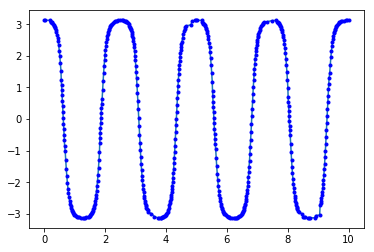

In [8]:
t2,time = adaptive_bsm(r,0,10,fun,1e-10)
plt.plot(time,t2)
plt.plot(time,t2,"b.")

In [35]:
#Q1
def dxdt(x,y,t):
    return 1-4*x+x**2*y
def dydt(x,y,t):
    return 3*x-x**2*y


In [36]:
#modified midpoint method
def m_mid(x0,y0,t0,h,fx,fy,n):
    x1 = x0+0.5*h*fx(x0,y0,t0)
    y1 = y0+0.5*h*fy(x0,y0,t0)
    x2 = x0+h*fx(x1,y1,t0+0.5*h)
    y2 = y0+h*fy(x1,y1,t0+0.5*h)
    for i in range(1,n):
        x1 += h*fx(x2,y2,t0+i*h)
        y1 += h*fy(x2,y2,t0+i*h)
        x2 += h*fx(x1,y1,t0+(i+0.5)*h)
        y2 += h*fy(x1,y1,t0+(i+0.5)*h)
    return x1,x2,y1,y2

#Bulirsch-Stoer Method for one step
def bsm(x0,y0,t0,fx,fy,H,tol):
    error = 2*H*tol
    eps_x = [error]
    eps_y = [error]
    n = 0
    X1 = np.empty([0,1],float)
    Y1 = np.empty([0,1],float)
    while (error > H*tol and n < MaxN):
        n +=1
        h = H/n
        X2 = X1
        Y2 = Y1
        X1 = np.empty([n,1],float)
        Y1 = np.empty([n,1],float)
        x1,x2,y1,y2 = m_mid(x0,y0,t0,h,fx,fy,n)
        #print(n)
        #print(x2,y2)
        X1[0] = 0.5*(x1+x2+0.5*h*fx(x2,y2,t0+H))
        Y1[0] = 0.5*(y1+y2+0.5*h*fy(x2,y2,t0+H))
        for m in range(1,n):
            eps_x = (X1[m-1]-X2[m-1])/((n/(n-1))**(2*m)-1)
            X1[m] = X1[m-1] + eps_x
            eps_y = (Y1[m-1]-Y2[m-1])/((n/(n-1))**(2*m)-1)
            Y1[m] = Y1[m-1] + eps_y
        error = max(abs(eps_x[0]),abs(eps_y[0]))
    return X1[n-1],Y1[n-1],error

def adaptive_bsm(x0,y0,t0,t1,fx,fy,tol):
    H = (t1-t0)/50
    x = []
    y = []
    t = []
    x.append(x0)
    y.append(y0)
    t.append(t0)
    for i in range(50):
        H1 = H
        H2 = H
        #print(H)
        while H1 > 10**-8:
            x1,y1,error = bsm(x0,y0,t0,fx,fy,H1,tol)
            #print(error,H)
            while error > H*tol and H1>2**(-20):
                H1 = H1/2
                x1,y1,error = bsm(x0,y0,t0,fx,fy,H1,tol)
            #print(error,H1)
            x.append(x1)
            y.append(y1)
            H2 = H2-H1
            t.append(t0+i*H+H-H2)
            H1 = H2
            x0 = x1
            y0 = y1
            
    return x,y,t
    
    
def fixed_bsm(x0,y0,t0,t1,fx,fy,tol):
    H = (t1-t0)/10000
    x = []
    y = []
    t = []
    x.append(x0)
    y.append(y0)
    t.append(t0)
    for i in range(10000):
        x1,y1,error = bsm(x0,y0,t0,fx,fy,H,tol)
        x.append(x1)
        y.append(y1)
        t.append(i*H)
        x0 = x1
        y0 = y1
    return x,y,t

In [37]:
x,y,t = adaptive_bsm(0,0,0,20,dxdt,dydt,1e-10)
#x,y,t = fixed_bsm(0,0,0,5,dxdt,dydt,1e-10)

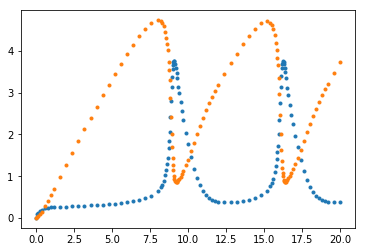

In [39]:
plt.plot(t,x,'.')
plt.plot(t,y,'.')


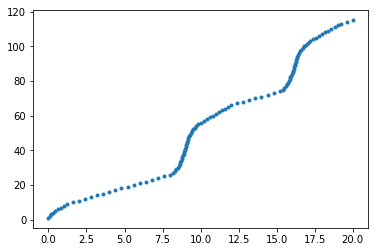

In [19]:
a = np.linspace(1,len(t),len(t))
plt.plot(t,a,'.')

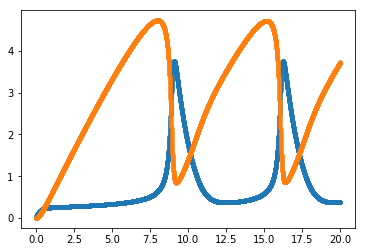

In [40]:
x,y,t = fixed_bsm(0,0,0,20,dxdt,dydt,1e-10)
plt.plot(t,x,'.')
plt.plot(t,y,'.')

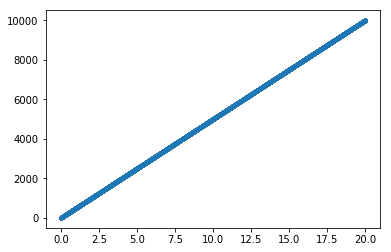

In [23]:
a = np.linspace(1,len(t),len(t))
plt.plot(t,a,'.')

In [4]:
def f(r):
    x=r[0];
    y=r[1];
    vx=r[2];
    vy=r[3];
    fvx=-x/(4*(x**2+y**2)**(3/2))-A/((vx**2+vy**2)**(3/2)+B)*vx;
    fvy=-y/(4*(x**2+y**2)**(3/2))-A/((vx**2+vy**2)**(3/2)+B)*vy;
    fx=vx;
    fy=vy;
    return np.array([fx,fy,fvx,fvy])

#implement fourth order Runge-Kutta

def rungekutta(r,h):
    
    k1=h*f(r); 
    k2=h*f(r+0.5*k1);
    k3=h*f(r+0.5*k2);
    k4=h*f(r+k3);
    #print(r+(1/6)*(k1+2*k2+2*k3+k4))
    return r+(1/6)*(k1+2*k2+2*k3+k4)

In [26]:
#Q2
#set up the equation

A=1;
B=1;

#initialize starting position and velocity

x=1;
y=0;
vx=0;
vy=4*10**-1;

a=0;
b=12;
N=10000;
d=10**-10; # error tolerance per unit time
h=(b-a)/N; #start value for time interval

r=[x,y,vx,vy];

tpoints=[];
xpoints=[];
ypoints=[];

tpoints.append(a);
xpoints.append(r[0])
ypoints.append(r[1])


rho= 30*h*d/min(abs(rungekutta(rungekutta(r,h),h)-rungekutta(r,2*h)))
t=a
while (t<b):

    while (rho<1):
        i = 0
        h=h/2;
        rho= 30*h*d/min(abs(rungekutta(rungekutta(r,h),h)-rungekutta(r,2*h)))
        i+=1
        if i>50:
            print(rho)
    r=rungekutta(r,h);
    t=t+h
    #print(rho)
    #save time
    tpoints.append(t)
    xpoints.append(r[0])
    ypoints.append(r[1])
    h= min(2*h, h*rho**0.25); #make sure that h doesn't blow up
    rho= 30*h*d/min(abs(rungekutta(rungekutta(r,h),h)-rungekutta(r,2*h)))

/home/server/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars
/home/server/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


KeyboardInterrupt: 

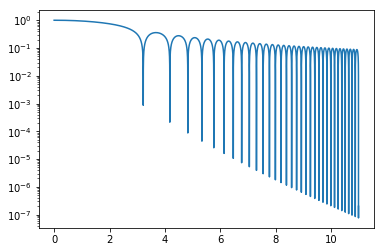

In [27]:
plt.semilogy(tpoints,np.sqrt(np.array(ypoints)**2+np.array(xpoints)**2))

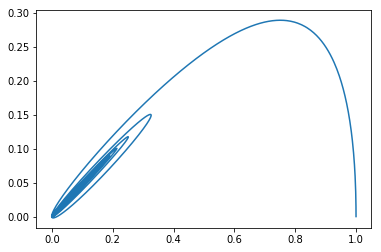

In [42]:
plt.plot(np.array(xpoints),np.array(ypoints))

In [53]:
FixA = [4.6463,10.74,16.881,22.792,29.028,34.835,40.952,46.803,50,50,50,50,50,50,50,50,50,50,50,50]
RatioA = []
for i in range(1,len(FixA)+1):
    RatioA.append(1/(0.5*i))

In [55]:
FixB = [20,10.74,6.2049,4.0207,4.526,5.0682,5.6358,6.2217,6.821,7.4306,8.0483,8.6723,9.3015,9.935,10.572,11.212,11.855,12.499,13.146,13.794]
RatioB = []
for i in range(1,len(FixA)+1):
    RatioB.append(0.5*i)

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

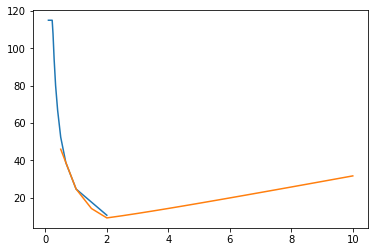

In [59]:
plt.plot(RatioA,np.array(FixA)*2.3)
plt.plot(RatioB,np.array(FixB)*2.3)
plt.xlabel("A/B")
plt.ylabel("time()")